# Song-Recommendation-ML

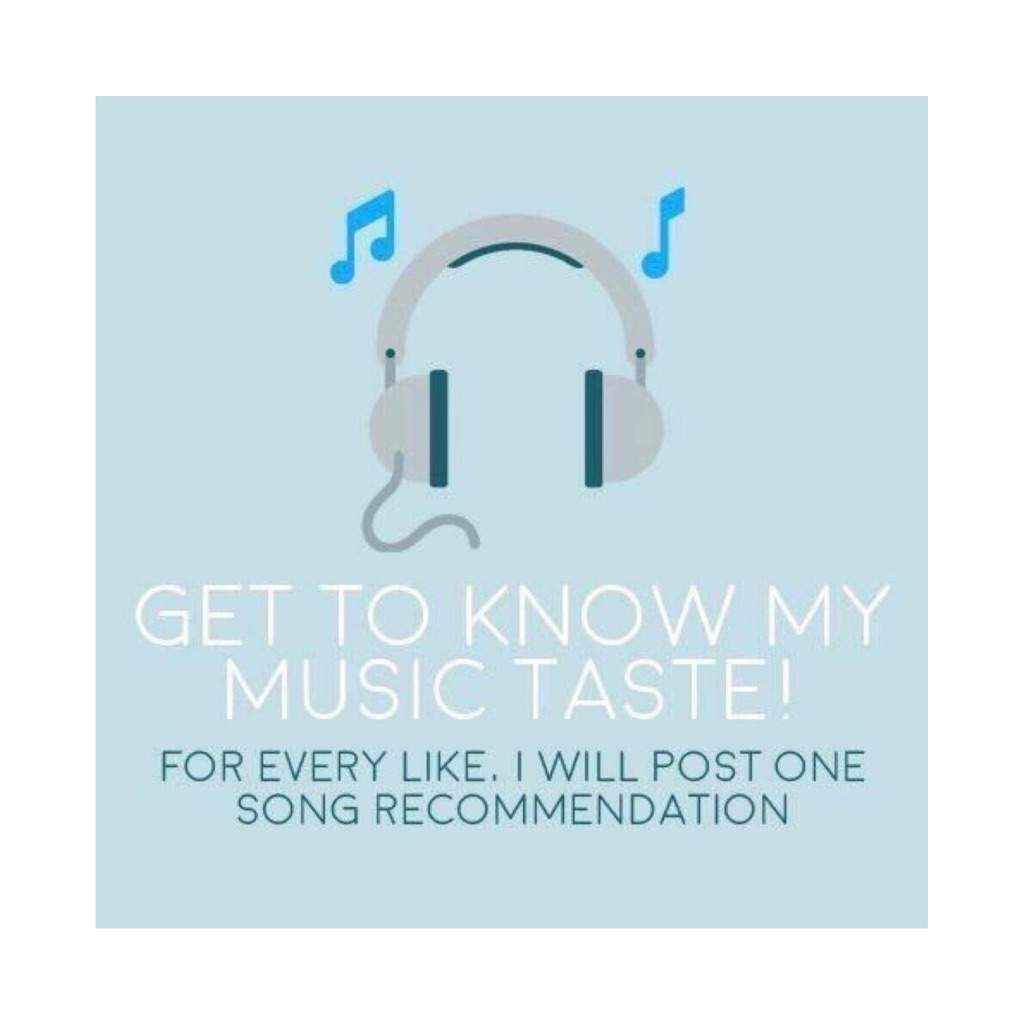

                            ~~~Image has been taken from Google Image.
Recommendation of a song for the listener nased on gender, age, region, artist they like and many more.

Let's connect our jupyter notebook to jovian.

# Problem Statement 

I selected the 15th data set from the resources tab in Jovian.
Link from where I downloaded the dataset: https://www.kaggle.com/c/MusicHackathon/data

This data has ratings given by the listeners, qualitative feedback, answers to the question on music and listeners demographics. We will use this dataset to get the rating of the test dataset.

It is a Regression type problem.

Installing the required libraries for making the model

In [ ]:
!pip install plotly==5.11.0

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (14, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
!pip install opendatasets

In [ ]:
import os
import opendatasets as od
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

Downloading data set from Kaggle in the notebook

In [ ]:
od.download('https://www.kaggle.com/c/MusicHackathon/data')

In [ ]:
os.listdir('MusicHackathon')

Converting the dataset to dataframe

In [ ]:
train_df = pd.read_csv('./MusicHackathon/train.csv')
test_df = pd.read_csv('./MusicHackathon/test.csv')
words_df = pd.read_csv('./MusicHackathon/words.csv', encoding = "ISO-8859-1")
users_df = pd.read_csv('./MusicHackathon/users.csv')

In [ ]:
train_df

In [ ]:
test_df

In [ ]:
words_df

In [ ]:
users_df

In [ ]:
words_df.info()

# Score to words DF

Now i will be giving score to 'words_df' by preprocessing the df.

The score system works like this:

* For each value 1 in the positive columns, we **add 1 point to the total score**
* For each value 1 in the negative columns, we **subtract 1 point to the total score**
* Any 0 and NaN value we **ignore as they are neutral**

In [ ]:
positive_score = ['Sophisticated', 'Sociable', 'Laid back', 'Wholesome', 'Uplifting', 'Intriguing', 'Legendary', 'Free', 'Outspoken', 'Good lyrics', 'Confident', 'Youthful', 'Current', 'Colourful', 'Stylish', 'Heartfelt', 'Pioneer', 'Outgoing', 'Inspiring', 'Beautiful', 'Fun', 'Authentic', 'Credible', 'Way out', 'Cool', 'Catchy', 'Sensitive', 'Passionate', 'Good Lyrics', 'Timeless', 'Original', 'Talented', 'Distinctive', 'Approachable', 'Genius', 'Trendsetter', 'Upbeat', 'Relatable', 'Energetic', 'Exciting', 'Emotional', 'Nostalgic', 'Progressive', 'Sexy', 'Over', 'Popular', 'Superstar', 'Relaxed', 'Iconic', 'Classic', 'Playful', 'Warm', 'Soulful']

In [ ]:
negative_score = ['Uninspired', 'Unattractive', 'Boring', 'Cheap', 'Irrelevant', 'Superficial', 'Annoying', 'Not authentic', 'Depressing', 'Noisy', 'Fake', 'Cheesy', 'Intrusive', 'Unoriginal', 'Dated', 'Unapproachable']

In [ ]:
words_df['plus_score'] = words_df[positive_score].sum(axis=1)
words_df['minus_score'] = words_df[negative_score].sum(axis=1)
words_df['words_score'] = words_df['plus_score'] - words_df['minus_score']

In [ ]:
words_df[words_df.LIKE_ARTIST > 90].sample(15)

As now we gave the word score we don't need the words columns in the words_df dataframe.
Now we will create a dateframe where the columns will be the **word score of above 90**

In [ ]:
words_red_df = words_df[['Artist', 'User', 'HEARD_OF', 'OWN_ARTIST_MUSIC', 'LIKE_ARTIST', 'words_score']]

In [ ]:
words_red_df

In [ ]:
words_red_df.info()

# Merging

Now we will merge words_red_df & users_df into training_merge_df dataframe

In [ ]:
users_df.rename(columns={'RESPID': 'User'}, inplace=True)

In [ ]:
training_merge_df = train_df.merge(words_red_df, how='left', on=['Artist', 'User'])

In [ ]:
users_df

In [ ]:
training_merge_df

In [ ]:
training_merge_df = training_merge_df.merge(users_df, how='left', on=['User'])

In [ ]:
training_merge_df

In [ ]:
training_merge_df.info()

In [ ]:
training_merge_df.sample(15)

Merging the test dataset

In [ ]:
test_merge_df = test_df.merge(words_red_df, how='left', on=['Artist', 'User'])
test_merge_df = test_merge_df.merge(users_df, how='left', on=['User'])

In [ ]:
test_merge_df

# Data Analysis 

Now we will try to get the insights from the dataset and see if there is any relationship between the columns. We must also check if any of the columns are interdependent. We ask Question and then we visualize the dataset to get the Answer.

We can do this by plotting the graphs for various columns and observing the relation between the two or more columns depending on the plot we choose.

In [ ]:
# Do you love or hate the the song?
px.histogram(training_merge_df, x='Rating', nbins=101, marginal='box', title='Rating(Love/Hate) Distribution')

In [ ]:
training_merge_df.columns

In [ ]:
plot_order= training_merge_df.groupby('Time')['Rating'].mean().sort_values(ascending=False).index.values

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Time of the market research vs. Rating')
sns.barplot(x='Time', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=0, ha='center')
plt.show();

In [ ]:
plot_order= training_merge_df.groupby('Artist')['Rating'].mean().sort_values(ascending=False).index.values

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Artist vs. Rating')
sns.barplot(x='Artist', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=270, ha='center')
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(24,12))

plt.title('Track vs. Rating')
sns.barplot(x='Track', y='Rating', data=training_merge_df)
plt.xticks(rotation=-90, fontsize=7, ha='center')
plt.show();

# Change of columns

In [ ]:
training_merge_df.info()

In [ ]:
training_merge_df['HEARD_OF'].value_counts()

In [ ]:
print('Missing values in HEARD_OF column {}'.format(training_merge_df['HEARD_OF'].isna().sum()))

In [ ]:
training_merge_df['HEARD_OF'].replace(['Ever heard of'], 'Never heard of', inplace=True)
training_merge_df['HEARD_OF'].replace(['Ever heard music by'], 'Heard of and listened to music EVER', inplace=True)
training_merge_df['HEARD_OF'].replace(['Listened to recently'], 'Heard of and listened to music RECENTLY', inplace=True)
training_merge_df['HEARD_OF'].fillna('Never heard of', inplace=True)

In [ ]:
training_merge_df['HEARD_OF'].unique()

In [ ]:
test_merge_df['HEARD_OF'].replace(['Ever heard of'], 'Never heard of', inplace=True)
test_merge_df['HEARD_OF'].replace(['Ever heard music by'], 'Heard of and listened to music EVER', inplace=True)
test_merge_df['HEARD_OF'].replace(['Listened to recently'], 'Heard of and listened to music RECENTLY', inplace=True)
test_merge_df['HEARD_OF'].fillna('Never heard of', inplace=True)

In [ ]:
test_merge_df['HEARD_OF'].unique()

In [ ]:
training_merge_df['HEARD_OF'].value_counts()

In [ ]:
plot_order= training_merge_df.groupby('HEARD_OF')['Rating'].mean().sort_values(ascending=False).index.values

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Have you heard music by this artist? vs. Rating')
sns.barplot(x='HEARD_OF', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=350, ha='left')
plt.show();

# Own_Artist_Music

In [ ]:
training_merge_df['OWN_ARTIST_MUSIC'].unique()

In [ ]:
training_merge_df['OWN_ARTIST_MUSIC'].value_counts()

In [ ]:
training_merge_df['OWN_ARTIST_MUSIC'].replace(['DonÕt know'], 'Own none of their music', inplace=True)
training_merge_df['OWN_ARTIST_MUSIC'].replace(['DonÍt know'], 'Own none of their music', inplace=True)
training_merge_df['OWN_ARTIST_MUSIC'].replace(['don`t know'], 'Own none of their music', inplace=True)
training_merge_df['OWN_ARTIST_MUSIC'].fillna('Own none of their music', inplace=True)

In [ ]:
test_merge_df['OWN_ARTIST_MUSIC'].replace(['DonÕt know'], 'Own none of their music', inplace=True)
test_merge_df['OWN_ARTIST_MUSIC'].replace(['DonÍt know'], 'Own none of their music', inplace=True)
test_merge_df['OWN_ARTIST_MUSIC'].replace(['don`t know'], 'Own none of their music', inplace=True)
test_merge_df['OWN_ARTIST_MUSIC'].fillna('Own none of their music', inplace=True)

In [ ]:
training_merge_df['OWN_ARTIST_MUSIC'].unique()

In [ ]:
training_merge_df['OWN_ARTIST_MUSIC'].value_counts()

In [ ]:
plot_order= training_merge_df.groupby('OWN_ARTIST_MUSIC')['Rating'].mean().sort_values(ascending=False).index.values

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Do you have this artist in your music collection? vs. Rating')
sns.barplot(x='OWN_ARTIST_MUSIC', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=340, ha='left')
plt.show();

# LIKE_ARTIST

In [ ]:
training_merge_df['LIKE_ARTIST'].unique()

In [ ]:
training_merge_df['LIKE_ARTIST'].value_counts()

In [ ]:
training_merge_df

In [ ]:
plt.title('To what extent do you like or dislike listening this artist? vs. Rating')
sns.scatterplot(x='LIKE_ARTIST', y='Rating', hue='GENDER', data=training_merge_df.sample(15000));

In [ ]:
training_merge_df[training_merge_df['LIKE_ARTIST'].isna()].Rating.describe()

In [ ]:
training_merge_df.Rating.describe()

In [ ]:
training_merge_df[~training_merge_df['LIKE_ARTIST'].isna()].Rating.describe()

# Words_Score

In [ ]:
plt.title('"Positive words - Negative words" Score vs. Rating')
sns.scatterplot(x='words_score', y='Rating', hue='GENDER', data=training_merge_df.sample(10000));

# GENDER

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Gender vs. Rating')
sns.barplot(x='GENDER', y='Rating', data=training_merge_df)
plt.xticks(rotation=340, ha='left')
plt.show();

# AGE

In [ ]:
plt.title('Age vs. Rating')
sns.scatterplot(x='AGE', y='Rating', hue='GENDER', data=training_merge_df.sample(10000));

In [ ]:
training_merge_df['AGE'].describe()

In [ ]:
print('Nan cells in the training_merge_df table {}'.format(training_merge_df['AGE'].isna().sum()))

In [ ]:
plt.title('Age Distribution')
sns.histplot(training_merge_df.AGE, bins=np.arange(10,80,1), color='purple');

In [ ]:
training_merge_df[training_merge_df['AGE'] > 50].AGE.count()

In [ ]:
def age_to_categorical(x):
  try:
    if int(x) <= 17:
      return '13-17'
    elif 17< int(x) <= 25:
      return '18-25'
    elif 25< int(x) <= 35:
      return '26-35'
    elif 35< int(x) <= 50:
      return '36-50'
    elif 50< int(x) <= 65:
      return '51-65'
    else:
      return 'older than 65'
  except:
    return np.nan

In [ ]:
training_merge_df['AGE_GROUP'] = training_merge_df['AGE'].apply(lambda x: age_to_categorical(x))

In [ ]:
training_merge_df['AGE_GROUP'].value_counts()

In [ ]:
training_merge_df['AGE_GROUP'].fillna('36-50', inplace=True)
training_merge_df['AGE'].fillna(39, inplace=True)

Test DataFrame

In [ ]:
test_merge_df['AGE_GROUP'] = test_merge_df['AGE'].apply(lambda x: age_to_categorical(x))
test_merge_df['AGE_GROUP'].fillna('36-50', inplace=True)
test_merge_df['AGE'].fillna(39, inplace=True)

In [ ]:
plot_order= training_merge_df.groupby('AGE_GROUP')['Rating'].mean().sort_values(ascending=False).index.values

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Age Group vs. Rating')
sns.barplot(x='AGE_GROUP', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=350, ha='left')
plt.show();

# Working

In [ ]:
training_merge_df['WORKING'].value_counts()

In [ ]:
plot_order= training_merge_df.groupby('WORKING')['Rating'].mean().sort_values(ascending=False).index.values

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Working status vs. Rating')
sns.barplot(x='WORKING', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=330, ha='left')
plt.show();

# Region

In [ ]:
training_merge_df['REGION'].unique()

In [ ]:
training_merge_df['REGION'].value_counts()

In [ ]:
training_merge_df['REGION'].replace(['North Ireland'], 'Northern Ireland', inplace=True)
test_merge_df['REGION'].replace(['North Ireland'], 'Northern Ireland', inplace=True)

In [ ]:
plot_order= training_merge_df.groupby('REGION')['Rating'].mean().sort_values(ascending=False).index.values

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Region vs. Rating')
sns.barplot(x='REGION', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=350, ha='left')
plt.show();

# Music

In [ ]:
training_merge_df['MUSIC'].unique()

In [ ]:
training_merge_df['MUSIC'].value_counts()

In [ ]:
training_merge_df['MUSIC'].replace(['Music is important to me but not necessarily more important'], 'Music is important to me but not necessarily more important than other hobbies or interests', inplace=True)
test_merge_df['MUSIC'].replace(['Music is important to me but not necessarily more important'], 'Music is important to me but not necessarily more important than other hobbies or interests', inplace=True)

In [ ]:
training_merge_df['MUSIC'].value_counts()

In [ ]:
plot_order= training_merge_df.groupby('MUSIC')['Rating'].mean().sort_values(ascending=False).index.values

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Importance of music in life. vs. Rating')
sns.barplot(x='MUSIC', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=350, ha='left')
plt.show();

# List own

In [ ]:
training_merge_df['LIST_OWN'].unique()

In [ ]:
training_merge_df['LIST_OWN'].value_counts()

In [ ]:
training_merge_df['LIST_OWN'].isna().sum()

In [ ]:
training_merge_df['LIST_OWN'].replace(['0 Hours'], '0', inplace=True)
training_merge_df['LIST_OWN'].replace(['Less than an hour'], '0.5', inplace=True)
training_merge_df['LIST_OWN'].replace(['1 hour'], '1', inplace=True)
training_merge_df['LIST_OWN'].replace(['2 hours'], '2', inplace=True)
training_merge_df['LIST_OWN'].replace(['3 hours'], '3', inplace=True)
training_merge_df['LIST_OWN'].replace(['4 hours'], '4', inplace=True)
training_merge_df['LIST_OWN'].replace(['5 hours'], '5', inplace=True)
training_merge_df['LIST_OWN'].replace(['6 hours'], '6', inplace=True)
training_merge_df['LIST_OWN'].replace(['7 hours'], '7', inplace=True)
training_merge_df['LIST_OWN'].replace(['8 hours'], '8', inplace=True)
training_merge_df['LIST_OWN'].replace(['9 hours'], '9', inplace=True)
training_merge_df['LIST_OWN'].replace(['10 hours'], '10', inplace=True)
training_merge_df['LIST_OWN'].replace(['11 hours'], '11', inplace=True)
training_merge_df['LIST_OWN'].replace(['12 hours'], '12', inplace=True)
training_merge_df['LIST_OWN'].replace(['13 hours'], '13', inplace=True)
training_merge_df['LIST_OWN'].replace(['14 hours'], '14', inplace=True)
training_merge_df['LIST_OWN'].replace(['15 hours'], '15', inplace=True)
training_merge_df['LIST_OWN'].replace(['16 hours'], '16', inplace=True)
training_merge_df['LIST_OWN'].replace(['16+ hours'], '16', inplace=True)
training_merge_df['LIST_OWN'].replace(['More than 16 hours'], '16', inplace=True)

In [ ]:
training_merge_df['LIST_OWN'].fillna('No Answer', inplace=True)

Test DataFrame

In [ ]:
test_merge_df['LIST_OWN'].replace(['0 Hours'], '0', inplace=True)
test_merge_df['LIST_OWN'].replace(['Less than an hour'], '0.5', inplace=True)
test_merge_df['LIST_OWN'].replace(['1 hour'], '1', inplace=True)
test_merge_df['LIST_OWN'].replace(['2 hours'], '2', inplace=True)
test_merge_df['LIST_OWN'].replace(['3 hours'], '3', inplace=True)
test_merge_df['LIST_OWN'].replace(['4 hours'], '4', inplace=True)
test_merge_df['LIST_OWN'].replace(['5 hours'], '5', inplace=True)
test_merge_df['LIST_OWN'].replace(['6 hours'], '6', inplace=True)
test_merge_df['LIST_OWN'].replace(['7 hours'], '7', inplace=True)
test_merge_df['LIST_OWN'].replace(['8 hours'], '8', inplace=True)
test_merge_df['LIST_OWN'].replace(['9 hours'], '9', inplace=True)
test_merge_df['LIST_OWN'].replace(['10 hours'], '10', inplace=True)
test_merge_df['LIST_OWN'].replace(['11 hours'], '11', inplace=True)
test_merge_df['LIST_OWN'].replace(['12 hours'], '12', inplace=True)
test_merge_df['LIST_OWN'].replace(['13 hours'], '13', inplace=True)
test_merge_df['LIST_OWN'].replace(['14 hours'], '14', inplace=True)
test_merge_df['LIST_OWN'].replace(['15 hours'], '15', inplace=True)
test_merge_df['LIST_OWN'].replace(['16 hours'], '16', inplace=True)
test_merge_df['LIST_OWN'].replace(['16+ hours'], '16', inplace=True)
test_merge_df['LIST_OWN'].replace(['More than 16 hours'], '16', inplace=True)
test_merge_df['LIST_OWN'].fillna('No Answer', inplace=True)

In [ ]:
plot_order= training_merge_df.groupby('LIST_OWN')['Rating'].mean().sort_values(ascending=False).index.values

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('No. of daily hours listening music vs. Rating')
sns.barplot(x='LIST_OWN', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=335, ha='left')
plt.show();

In [ ]:
lo_mapper = {'No Answer': 'No Answer', 
          '0': '0', 
          '0.5': '0.5',
          '1': '1',
          '2': '2',
          '3': '3-6',
          '4': '3-6',
          '5': '3-6',
          '6': '3-6',
          '7': '7-10',
          '8': '7-10',
          '9': '7-10',
          '10': '7-10',
          '11': '11-14',
          '12':  '11-14',
          '13': '11-14',
          '14': '11-14',
          '15': '15-19',
          '16': '15-19',
          '17': '15-19',
          '18': '15-19',
          '19': '15-19',
          '20': '20 and plus',
          '21': '20 and plus',
          '22': '20 and plus',
          '23': '20 and plus',
          '24': '20 and plus'
          }

In [ ]:
training_merge_df['LIST_OWN'] = training_merge_df['LIST_OWN'].map(lo_mapper)

In [ ]:
training_merge_df['LIST_OWN'].unique()

In [ ]:
training_merge_df['LIST_OWN'].value_counts()

In [ ]:
plot_order= training_merge_df.groupby('LIST_OWN')['Rating'].mean().sort_values(ascending=False).index.values

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('No. of daily hours listening music vs. Rating')
sns.barplot(x='LIST_OWN', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=340, ha='left')
plt.show();

In [ ]:
test_merge_df['LIST_OWN'] = test_merge_df['LIST_OWN'].map(lo_mapper)

# List Back

In [ ]:
training_merge_df['LIST_BACK'].unique()

In [ ]:
training_merge_df['LIST_BACK'].value_counts()

In [ ]:
training_merge_df['LIST_BACK'].replace(['0 Hours'], '0', inplace=True)
training_merge_df['LIST_BACK'].replace(['Less than an hour'], '0.5', inplace=True)
training_merge_df['LIST_BACK'].replace(['1 hour'], '1', inplace=True)
training_merge_df['LIST_BACK'].replace(['2 hours'], '2', inplace=True)
training_merge_df['LIST_BACK'].replace(['3 hours'], '3', inplace=True)
training_merge_df['LIST_BACK'].replace(['4 hours'], '4', inplace=True)
training_merge_df['LIST_BACK'].replace(['5 hours'], '5', inplace=True)
training_merge_df['LIST_BACK'].replace(['6 hours'], '6', inplace=True)
training_merge_df['LIST_BACK'].replace(['7 hours'], '7', inplace=True)
training_merge_df['LIST_BACK'].replace(['8 hours'], '8', inplace=True)
training_merge_df['LIST_BACK'].replace(['9 hours'], '9', inplace=True)
training_merge_df['LIST_BACK'].replace(['10 hours'], '10', inplace=True)
training_merge_df['LIST_BACK'].replace(['11 hours'], '11', inplace=True)
training_merge_df['LIST_BACK'].replace(['12 hours'], '12', inplace=True)
training_merge_df['LIST_BACK'].replace(['13 hours'], '13', inplace=True)
training_merge_df['LIST_BACK'].replace(['14 hours'], '14', inplace=True)
training_merge_df['LIST_BACK'].replace(['15 hours'], '15', inplace=True)
training_merge_df['LIST_BACK'].replace(['16 hours'], '16', inplace=True)
training_merge_df['LIST_BACK'].replace(['16+ hours'], '16', inplace=True)
training_merge_df['LIST_BACK'].replace(['More than 16 hours'], '16', inplace=True)

In [ ]:
training_merge_df['LIST_BACK'].fillna('No Answer', inplace=True)

In [ ]:
training_merge_df['LIST_BACK'] = training_merge_df['LIST_BACK'].map(lo_mapper)

In [ ]:
plot_order= training_merge_df.groupby('LIST_BACK')['Rating'].mean().sort_values(ascending=False).index.values

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('No. of daily hours listening background music vs. Rating')
sns.barplot(x='LIST_BACK', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=340, ha='left')
plt.show();

# Test DataFrame

In [ ]:
test_merge_df['LIST_BACK'].replace(['0 Hours'], '0', inplace=True)
test_merge_df['LIST_BACK'].replace(['Less than an hour'], '0.5', inplace=True)
test_merge_df['LIST_BACK'].replace(['1 hour'], '1', inplace=True)
test_merge_df['LIST_BACK'].replace(['2 hours'], '2', inplace=True)
test_merge_df['LIST_BACK'].replace(['3 hours'], '3', inplace=True)
test_merge_df['LIST_BACK'].replace(['4 hours'], '4', inplace=True)
test_merge_df['LIST_BACK'].replace(['5 hours'], '5', inplace=True)
test_merge_df['LIST_BACK'].replace(['6 hours'], '6', inplace=True)
test_merge_df['LIST_BACK'].replace(['7 hours'], '7', inplace=True)
test_merge_df['LIST_BACK'].replace(['8 hours'], '8', inplace=True)
test_merge_df['LIST_BACK'].replace(['9 hours'], '9', inplace=True)
test_merge_df['LIST_BACK'].replace(['10 hours'], '10', inplace=True)
test_merge_df['LIST_BACK'].replace(['11 hours'], '11', inplace=True)
test_merge_df['LIST_BACK'].replace(['12 hours'], '12', inplace=True)
test_merge_df['LIST_BACK'].replace(['13 hours'], '13', inplace=True)
test_merge_df['LIST_BACK'].replace(['14 hours'], '14', inplace=True)
test_merge_df['LIST_BACK'].replace(['15 hours'], '15', inplace=True)
test_merge_df['LIST_BACK'].replace(['16 hours'], '16', inplace=True)
test_merge_df['LIST_BACK'].replace(['16+ hours'], '16', inplace=True)
test_merge_df['LIST_BACK'].replace(['More than 16 hours'], '16', inplace=True)
test_merge_df['LIST_BACK'].fillna('No Answer', inplace=True)

test_merge_df['LIST_BACK'] = test_merge_df['LIST_BACK'].map(lo_mapper)

In [ ]:
plt.title('Q17 vs. Ratings')
sns.scatterplot(x='Q17', y='Rating', hue='GENDER', data=training_merge_df.sample(3000));

In [ ]:
training_merge_df.info()

# HEARD_OF 

In [ ]:
mapper = {'Heard of and listened to music RECENTLY': 4, 
          'Heard of and listened to music EVER': 3,
          'Heard of': 2,
          'Never heard of': 1}

In [ ]:
training_merge_df['HEARD_OF'] = training_merge_df['HEARD_OF'].map(mapper)


Test DataFrame

In [ ]:
test_merge_df['HEARD_OF'] = test_merge_df['HEARD_OF'].map(mapper)

In [ ]:
training_merge_df['HEARD_OF'].unique()

In [ ]:
training_merge_df['HEARD_OF'].value_counts()

# Own Art Music

In [ ]:
oam_mapper = {'Own all or most of their music': 4, 
          'Own a lot of their music': 3, 
          'Own a little of their music': 2,
          'Own none of their music': 1}

In [ ]:
training_merge_df['OWN_ARTIST_MUSIC'] = training_merge_df['OWN_ARTIST_MUSIC'].map(oam_mapper)

Test DataFrame

In [ ]:
test_merge_df['OWN_ARTIST_MUSIC'] = test_merge_df['OWN_ARTIST_MUSIC'].map(oam_mapper)

In [ ]:
training_merge_df['OWN_ARTIST_MUSIC'].unique()

In [ ]:
training_merge_df['OWN_ARTIST_MUSIC'].value_counts()

# Like Artist

In [ ]:
training_merge_df['LIKE_ARTIST'].isna().sum()

In [ ]:
def to_categorical(x):
  try:
    if 1<= int(x) <= 10:
      return '1-10'
    elif 11<= int(x) <= 20:
      return '11-20'
    elif 21<= int(x) <= 30:
      return '21-30'
    elif 31<= int(x) <= 40:
      return '31-40'
    elif 41<= int(x) <= 50:
      return '41-50'
    elif 51<= int(x) <= 60:
      return '51-60'
    elif 61<= int(x) <= 70:
      return '61-70'
    elif 71<= int(x) <= 80:
      return '71-80'
    elif 81<= int(x) <= 90:
      return '81-90'
    else:
      return '91-100'
  except:
    return np.nan

In [ ]:
training_merge_df['LIKE_ARTIST'] = training_merge_df['LIKE_ARTIST'].apply(lambda x: to_categorical(x))

test_merge_df['LIKE_ARTIST'] = test_merge_df['LIKE_ARTIST'].apply(lambda x: to_categorical(x))

In [ ]:
training_merge_df['LIKE_ARTIST'].fillna('No Answer', inplace=True)

test_merge_df['LIKE_ARTIST'].fillna('No Answer', inplace=True)

In [ ]:
training_merge_df['LIKE_ARTIST'].value_counts()

# Music

In [ ]:
training_merge_df['MUSIC'].unique()

In [ ]:
training_merge_df['MUSIC'].value_counts()

In [ ]:
m_mapper = {'Music means a lot to me and is a passion of mine': 6, 
          'Music is important to me but not necessarily more important than other hobbies or interests': 5, 
          'No Answer': 4,
          'I like music but it does not feature heavily in my life': 3,
          'Music is no longer as important as it used to be to me': 2,
          'Music has no particular interest for me': 1,
          }

In [ ]:
training_merge_df['MUSIC'] = training_merge_df['MUSIC'].map(m_mapper)

Test DataFrame

In [ ]:
test_merge_df['MUSIC'] = test_merge_df['MUSIC'].map(m_mapper)

#Missing Values in DF

In [ ]:
training_merge_df['GENDER'].fillna('No Answer', inplace=True)
training_merge_df['WORKING'].fillna('No Answer', inplace=True)
training_merge_df['REGION'].fillna('No Answer', inplace=True)

test_merge_df['GENDER'].fillna('No Answer', inplace=True)
test_merge_df['WORKING'].fillna('No Answer', inplace=True)
test_merge_df['REGION'].fillna('No Answer', inplace=True)

#Training & Validation Sets

### As test set is already given.
We put 20% of Training test into calidation set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
training_df, validation_df = train_test_split(training_merge_df, test_size=0.2)

In [ ]:
print('training_df.shape :', training_df.shape)
print('validation_df.shape :', validation_df.shape)

In [ ]:
training_df

In [ ]:
validation_df

# Input and Target Col's

In [ ]:
input_cols = list(training_df.columns)
input_cols.remove('Rating')
input_cols.remove('AGE')

target_col = 'Rating'

In [ ]:
training_inputs = training_df[input_cols].copy()
training_targets = training_df[target_col].copy()

In [ ]:
validation_inputs = validation_df[input_cols].copy()
validation_targets = validation_df[target_col].copy()

In [ ]:
test_inputs = test_merge_df[input_cols].copy()

In [ ]:
training_inputs

In [ ]:
validation_inputs

In [ ]:
test_inputs

# Segregation of Numeric and Catego... Cols

In [ ]:
numeric_cols = ['Artist', 'Track', 'User', 'Time', 'HEARD_OF', 'OWN_ARTIST_MUSIC', 'words_score', 'MUSIC', 'Q1', 'Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19']

categorical_cols = ['LIKE_ARTIST', 'GENDER', 'WORKING', 'REGION', 'LIST_OWN', 'LIST_BACK', 'AGE_GROUP' ]

In [ ]:
training_inputs[numeric_cols].describe()

In [ ]:
training_inputs[numeric_cols].info()

In [ ]:
training_inputs[categorical_cols].nunique()

# Replacing Missing Data

In [ ]:
training_merge_df[numeric_cols].isna().sum()

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
imputer.fit(training_merge_df[numeric_cols])

In [ ]:
training_inputs[numeric_cols] = imputer.transform(training_inputs[numeric_cols])
validation_inputs[numeric_cols] = imputer.transform(validation_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
training_inputs[numeric_cols].isna().sum()

# Scaling of Numeric Col's

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(training_merge_df[numeric_cols])

In [ ]:
training_inputs[numeric_cols] = scaler.transform(training_inputs[numeric_cols])
validation_inputs[numeric_cols] = scaler.transform(validation_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
training_inputs[numeric_cols].describe()

In [ ]:
training_inputs[numeric_cols].info()

In [ ]:
# Encoding Categorical data

In [ ]:
training_merge_df[categorical_cols].isna().sum()

In [ ]:
training_merge_df[categorical_cols].nunique()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
encoder.fit(training_merge_df[categorical_cols])

In [ ]:
encoded_cols = list(encoder.get_feature_names(categorical_cols));

In [ ]:
training_inputs[encoded_cols] = encoder.transform(training_inputs[categorical_cols])
validation_inputs[encoded_cols] = encoder.transform(validation_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
training_inputs

In [ ]:
# Saving to Disk

In [ ]:
print('training_inputs:', training_inputs.shape)
print('training_targets:', training_targets.shape)
print('validation_inputs:', validation_inputs.shape)
print('validation_targets:', validation_targets.shape)
print('test_inputs:', test_inputs.shape)

In [ ]:
!pip install pyarrow --quiet

In [ ]:
training_inputs.to_parquet('training_inputs.parquet')
validation_inputs.to_parquet('validation_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [ ]:
pd.DataFrame(training_targets).to_parquet('training_targets.parquet')
pd.DataFrame(validation_targets).to_parquet('validation_targets.parquet')

Getting Data Back

In [ ]:
training_inputs = pd.read_parquet('training_inputs.parquet')
validation_inputs = pd.read_parquet('validation_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

training_targets = pd.read_parquet('training_targets.parquet')[target_col]
validation_targets = pd.read_parquet('validation_targets.parquet')[target_col]

In [ ]:
print('training_inputs:', training_inputs.shape)
print('training_targets:', training_targets.shape)
print('validation_inputs:', validation_inputs.shape)
print('validation_targets:', validation_targets.shape)
print('test_inputs:', test_inputs.shape)

# Starting Modeling

In [ ]:
X_training = training_inputs[numeric_cols + encoded_cols]

X_validation = validation_inputs[numeric_cols + encoded_cols]

X_test = test_inputs[numeric_cols + encoded_cols]

## Training

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor(n_jobs=0)

In [ ]:
model.fit(X_training, training_targets)

In [ ]:
prediction = model.predict(X_training)

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
  return mean_squared_error(a, b, squared=False)

In [ ]:
rmse(prediction, training_targets)

In [ ]:
impt_df = pd.DataFrame({'feature': X_training.columns,
'importance': model.feature_importances_}).sort_values('importance', ascending=False)

In [ ]:
impt_df.head(10)

# Hyperparametre Tuning

In [ ]:
def test_params(**params):
  model = XGBRegressor(n_jobs=-1, **params)
  model.fit(X_training, training_targets)
  training_rmse = rmse(model.predict(X_training), training_targets)
  validation_rmse = rmse(model.predict(X_validation), validation_targets)
  print('Training RMSE: {}, Validation RMSE: {}'.format(training_rmse, validation_rmse))

In [ ]:
test_params(n_estimators=100)

In [ ]:
test_params(n_estimators=200)

In [ ]:
test_params(n_estimators=400)

In [ ]:
test_params(n_estimators=800)

# Tree depth & Learning rate

In [ ]:
test_params(n_estimators=175, max_depth=8, learning_rate=0.3)

In [ ]:
test_params(n_estimators=175, max_depth=8, learning_rate=0.2)

In [ ]:
test_params(booster='gblinear', n_estimators=400)

In [198]:
test_params(n_estimators=500, max_depth=9, learning_rate=0.15)

In [ ]:
test_params(n_estimators=1000, max_depth=10, learning_rate=0.10, subsample=0.9, colsample_bytree=0.7)

[11:23:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def train_and_evaluate(X_train_k, Y_train_k, X_val_k, Y_val_k, **params):
  model = XGBRegressor(n_jobs=-1, **params)
  model.fit(X_train_k, Y_train_k)
  train_rmse = rmse(model.predict(X_train_k), Y_train_k)
  val_rmse = rmse(model.predict(X_val_k), Y_val_k)
  return model, train_rmse, val_rmse

In [ ]:
kfold = KFold(n_splits=5)

In [ ]:
models = []

for train_idxs, val_idxs in kfold.split(X_training):
  X_train_k, Y_train_k = X_training.iloc[train_idxs], training_targets.iloc[train_idxs]
  X_val_k, Y_val_k = X_training.iloc[val_idxs], training_targets.iloc[val_idxs]
  model, train_rmse, val_rmse = train_and_evaluate(X_train_k, Y_train_k, X_val_k, Y_val_k, n_estimators=500, max_depth=9, learning_rate=0.10, subsample=0.9, colsample_bytree=0.7)
  models.append(model)
  print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [ ]:
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [ ]:
preds_kfold = predict_avg(models, X_validation)
rmse(preds_kfold, validation_targets)

In [ ]:
test_preds = predict_avg(models, X_test)

# Final Answer

In [ ]:
test_preds.shape

# Model 2
## **RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_randomForestRegressor = RandomForestRegressor()

In [ ]:
model_randomForestRegressor.fit(X_training, training_targets)

In [ ]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(X_training, training_targets)
    return model.score(X_training, training_targets), model.score(X_validation, validation_targets)

## Hyperparameter Tuning

## max_depth and max_leaf_nodes

In [ ]:
test_params(max_depth=100, max_leaf_nodes=2**2)

In [ ]:
test_params(max_depth=200, max_leaf_nodes=2**4)

In [ ]:
test_params(max_depth=800, max_leaf_nodes=2**16)

# Performance of RFR

In [ ]:
preds_randomForestRegressor = model_randomForestRegressor.predict(X_validation)
rmse(preds_randomForestRegressor, validation_targets)

Performance of RFR is less than XGBR /
So, we will continue with XGBR Model

# Importance of columns

In [ ]:
importance_df = pd.DataFrame({'feature': X_training.columns,
'importance': model.feature_importances_}).sort_values('importance', ascending=False)

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Saving the model

In [ ]:
import joblib

In [ ]:
song_recommendation_ml = {
    'model': models,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_cols': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [ ]:
joblib.dump(song_recommendation_ml, 'song_recommendation_ml')

In [ ]:
['song_recommendation_ml']

# Conslusion

In this project, I started with downloading the data from kaggle. Then after I started with exploring and analyzing the dataset. I also cleaned the dataset and made some visualizations to get the insights from the dataset. I also found some relationships between the columns of the dataset using the visualizations. Then with the help of pandas library in python, I was able to calculate the relationship between the columns mathematically. I choosed XGBoost and RFR these two models to make my model. To get the best model I tuned the hyperparametres in both the models. Then by comparing the performance of both the models, I choosed the final model which has high performance. I also made a visulatization to show the importance of the colums in the dataset to get the output. At last I saved the model and also added the references and the future work I am intrestes in.

# References and Future Work
References: The websites that I found useful during this project work are Scikit-learn, Stackoverflow, W3schools, GFG, and many more.

* [GFG](https://www.geeksforgeeks.org/xgboost-for-regression/) \
* [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) 
* [GFG](https://www.geeksforgeeks.org/ml-feature-scaling-part-2/)
* [Stack overflow](https://stackoverflow.com/questions/74839604/assertion-on-task-failed-must-inherit-from-class-task-but-has-class-data)
* [Medium](https://towardsdatascience.com/random-forest-regression-5f605132d19d)

## Future work
Now, I will continue on this project, by adding the songs data and selecting the recommended song for the listner from the dataset. In the dataset of the song we have to differentiate the songs by the lyrics in the song, by the lyrics of the song we can is it a sad, happy or romatic song. By the words in the lyrics of the song we can recommed the type of song that the listerner wants.